In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd


In [2]:
print("GPUs disponibles:")
print(tf.config.list_physical_devices('GPU'))

GPUs disponibles:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Definir la ruta de la carpeta que contiene las imágenes PNG
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\imagenesMak1'

# Obtener la lista de nombres de archivos de imágenes
archivos_imagenes = os.listdir(ruta_carpeta)

# Cargar las imágenes y convertirlas en matrices numpy
imagenes = []
nombre = []

for archivo in archivos_imagenes:
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    imagen = load_img(ruta_imagen, color_mode='grayscale', target_size=(128, 128))  # Convertir a escala de grises y redimensionar
    imagen = img_to_array(imagen) / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    imagenes.append(imagen)
    nombre.append(archivo)

    
    
# Convertir la lista de imágenes a un arreglo numpy
imagenes = np.array(imagenes)


In [4]:
imagenes.shape

(1254, 128, 128, 1)

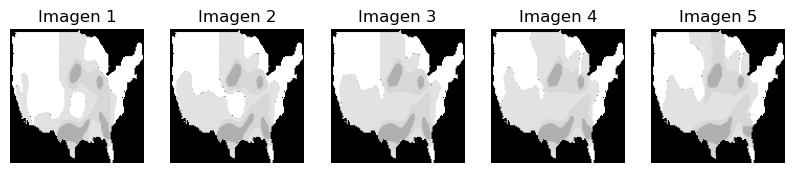

Array numpy 1:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 2:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 3:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 4:
[[[0.]
  [0.]
  [0.]
 

In [5]:
# Imprimir las primeras 5 imágenes
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagenes[i].reshape(128, 128), cmap='gray')
    plt.title(f'Imagen {i+1}')
    plt.axis('off')
plt.show()

# Imprimir los primeros 5 arrays numpy correspondientes
for i in range(5):
    print(f"Array numpy {i+1}:\n{imagenes[i]}")

In [6]:
# Dividir el conjunto de datos en datos de entrenamiento y validación
X_train, X_val = train_test_split(imagenes, test_size=0.2, random_state=42)
Y_train, Y_val = train_test_split(nombre, test_size=0.2, random_state=42)

In [9]:

from keras.layers import Input, Flatten, Dense, Reshape
from keras.models import Model

# Construir el modelo del autoencoder
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Adaptar el encoder a capas densas
flatten = Flatten()(encoded)
encoded_dense = Dense(128, activation='relu')(flatten)

# Decoder
x = Dense(64, activation='relu')(encoded_dense)
x = Reshape((16, 16, 1))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Crear el modelo del encoder
encoder = Model(input_img, encoded_dense)

# Entrenar el modelo
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, X_val))

ValueError: Exception encountered when calling layer "reshape_1" (type Reshape).

total size of new array must be unchanged, input_shape = [64], output_shape = [16, 16, 1]

Call arguments received by layer "reshape_1" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 64), dtype=float32)